In [1]:
import agent
import gym
import matplotlib.pyplot as plt
from tqdm import tqdm

### Environnement

In [2]:
env = gym.make('MountainCar-v0')

### Agent

In [3]:
position_boundaries = (env.observation_space.low[0], env.observation_space.high[0])
velocity_boundaries = (env.observation_space.low[1], env.observation_space.high[1])

agent_init = {
    'discount_factor': 1, 
    'learning_rate': 0.5, 
    'epsilon': 0.000001,
    'num_action': env.action_space.n,
    'tile_coder': {
        'num_tiles': 8,
        'num_tilings': 20,
        'hash_size': 4096,
        'position_boundaries': position_boundaries, 
        'velocity_boundaries': velocity_boundaries
    }
}
sarsa_agent = agent.SarsaAgent(agent_init)

### RUN

In [4]:
timesteps_per_episode = list()
rewards_per_episode = list()
epoch_size = 20
n_episode = 2000
t_max_per_episode = 200
verbose = False

max_position = -.4

In [5]:
assert n_episode % epoch_size == 0, f"epoch_size ({epoch_size}) must be a divisor of n_episode ({n_episode})"

for i_episode in tqdm(range(n_episode)):
    state = env.reset()
    rewards = 0
    sarsa_agent.choose_action(state)
    for t in range(t_max_per_episode):
        if verbose:
            env.render()
        state, reward, done, info = env.step(sarsa_agent.next_action)
        
        if state[0] > max_position:
            reward += 20
            max_position = state[0]
            
        sarsa_agent.update(state, reward, done)
        rewards += reward
        if done:
            break
    timesteps_per_episode.append(t)
    rewards_per_episode.append(rewards)
    
env.close()

100%|██████████| 2000/2000 [00:25<00:00, 77.45it/s]


### ANALYSIS

In [6]:
timesteps_per_episode = np.array(timesteps_per_episode)
timesteps_per_episode.min()

82

In [7]:
timesteps_per_episode.reshape(epoch_size, int(n_episode/epoch_size)).mean(axis=0)

array([112.95, 119.45, 111.1 , 110.8 , 111.3 , 112.75, 111.6 , 112.9 ,
       107.8 , 123.15, 108.8 , 110.85, 111.55, 113.85, 110.4 , 103.1 ,
       105.95, 114.75, 114.65, 114.5 , 110.25, 110.4 , 110.65, 105.7 ,
       102.5 , 107.7 , 119.  , 109.3 , 108.6 , 115.3 , 112.7 , 112.15,
       119.65, 106.05, 112.55, 115.15, 101.2 , 102.6 , 110.65, 108.  ,
       110.05, 110.55, 107.55, 108.35, 106.9 , 111.3 , 108.5 , 112.95,
       101.65, 113.35, 106.  , 114.35, 113.2 , 112.75, 107.4 , 108.35,
       110.6 , 105.2 , 114.6 , 109.25, 110.15, 115.65, 106.55, 115.85,
       109.5 , 101.65, 117.4 , 104.4 , 101.85, 114.5 , 111.15, 105.7 ,
       111.3 , 112.15, 124.15, 115.  , 111.2 , 110.  , 108.9 , 110.  ,
       107.45, 109.4 , 113.1 , 107.95, 107.8 , 116.6 , 113.2 , 116.5 ,
       112.4 , 103.4 , 110.85, 101.75, 112.75, 109.55, 111.35, 119.1 ,
       110.75, 110.55, 107.8 , 118.65])

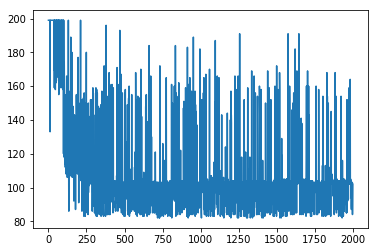

In [8]:
plt.plot(range(n_episode), timesteps_per_episode)

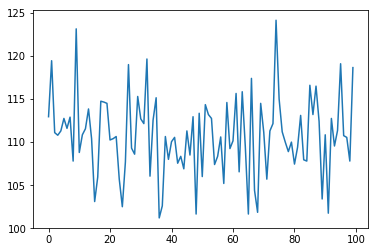

In [9]:
plt.plot(range(int(n_episode/epoch_size)), timesteps_per_episode.reshape(epoch_size, int(n_episode/epoch_size)).mean(axis=0))

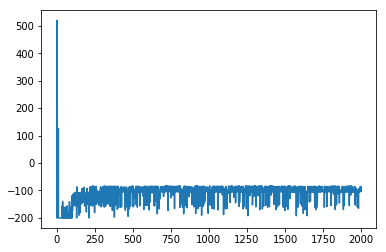

In [10]:
rewards_per_episode = np.array(rewards_per_episode)
plt.plot(range(n_episode), rewards_per_episode)

In [11]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

Rolling Average

In [12]:
timesteps_per_episode_rolling_mean = moving_average(timesteps_per_episode, n=10)

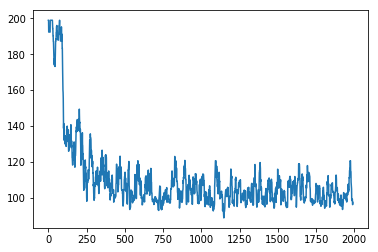

In [13]:
plt.plot(range(len(timesteps_per_episode_rolling_mean)), timesteps_per_episode_rolling_mean)